In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)
print(hub.__version__)

2.15.0
0.16.1


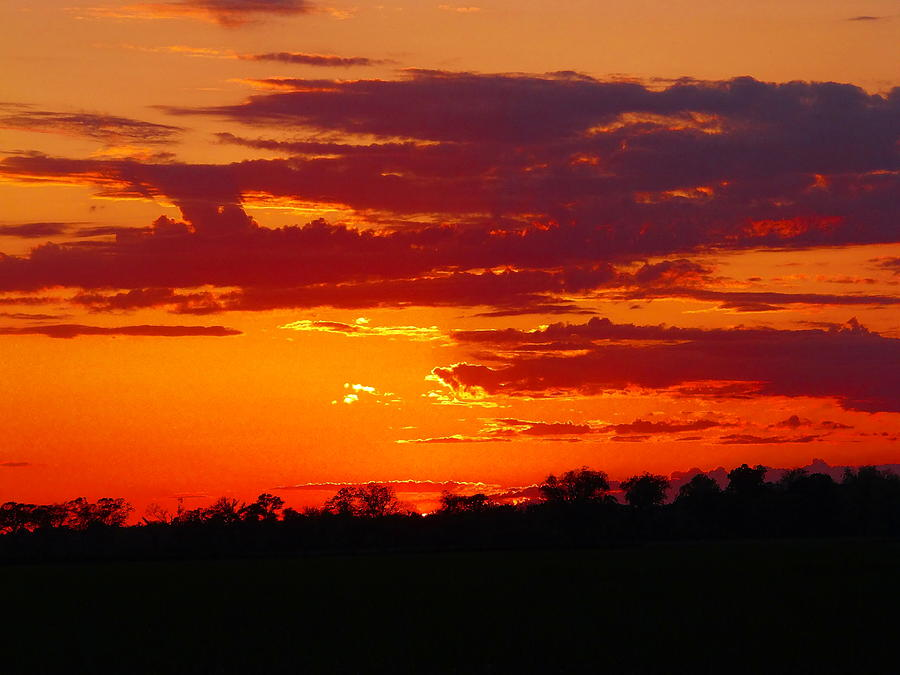

In [2]:
image=Image.open('/content/image.jpg')
image

In [3]:
image.size

(900, 675)

In [4]:
width,height=image.size
print(width,height)

900 675


In [5]:
image=image.resize((257,257))

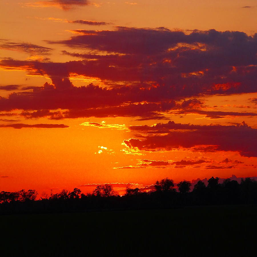

In [6]:
image

In [7]:
image.size

(257, 257)

In [8]:
type(image)

PIL.Image.Image

In [13]:
type(image)

numpy.ndarray

array([[[206, 126,  65],
        [206, 126,  65],
        [206, 126,  69],
        ...,
        [193, 120,  67],
        [193, 118,  68],
        [195, 117,  73]],

       [[208, 128,  67],
        [208, 128,  68],
        [207, 126,  69],
        ...,
        [196, 119,  67],
        [195, 118,  66],
        [196, 119,  67]],

       [[207, 127,  66],
        [207, 127,  67],
        [207, 126,  69],
        ...,
        [198, 118,  67],
        [197, 118,  66],
        [197, 119,  69]],

       ...,

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  4,   4,   2],
        [  4,   4,   2],
        [  4,   4,   4]],

       [[  4,   4,   3],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  4,   4,   3],
        [  4,   4,   3],
        [  4,   4,   4]],

       [[  5,   6,   0],
        [  5,   6,   2],
        [  5,   5,   3],
        ...,
        [  4,   3,   5],
        [  4,   4,   7],
        [  3,   5,   4]]], dtype=uint8)
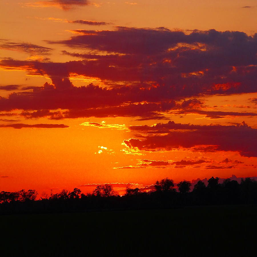

In [14]:
image

In [15]:
image.shape

(257, 257, 3)

In [16]:
image=np.expand_dims(image.astype(np.float32)/255.,axis=0)

In [17]:
image.shape

(1, 257, 257, 3)

In [18]:
image

array([[[[0.80784315, 0.49411765, 0.25490198],
         [0.80784315, 0.49411765, 0.25490198],
         [0.80784315, 0.49411765, 0.27058825],
         ...,
         [0.75686276, 0.47058824, 0.2627451 ],
         [0.75686276, 0.4627451 , 0.26666668],
         [0.7647059 , 0.45882353, 0.28627452]],

        [[0.8156863 , 0.5019608 , 0.2627451 ],
         [0.8156863 , 0.5019608 , 0.26666668],
         [0.8117647 , 0.49411765, 0.27058825],
         ...,
         [0.76862746, 0.46666667, 0.2627451 ],
         [0.7647059 , 0.4627451 , 0.25882354],
         [0.76862746, 0.46666667, 0.2627451 ]],

        [[0.8117647 , 0.49803922, 0.25882354],
         [0.8117647 , 0.49803922, 0.2627451 ],
         [0.8117647 , 0.49411765, 0.27058825],
         ...,
         [0.7764706 , 0.4627451 , 0.2627451 ],
         [0.77254903, 0.4627451 , 0.25882354],
         [0.77254903, 0.46666667, 0.27058825]],

        ...,

        [[0.01568628, 0.01568628, 0.01568628],
         [0.01568628, 0.01568628, 0.01568628]

In [10]:
image=np.array(image)

In [19]:
models_links = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [20]:
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [21]:
model_path = models_links[model_name]

In [22]:
model = hub.load(model_path)

In [23]:
result = model.signatures['default'](tf.constant(image))

In [24]:
result

{'default': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.79914045, 0.51763886, 0.28770193],
          [0.7873176 , 0.53113085, 0.24124348],
          [0.78220206, 0.49289817, 0.26806796],
          ...,
          [0.8701303 , 0.55244064, 0.3094968 ],
          [0.8695235 , 0.54644054, 0.33442423],
          [0.8142035 , 0.5975884 , 0.40235746]],
 
         [[0.82165444, 0.4881045 , 0.2427932 ],
          [0.81646705, 0.52402604, 0.27009377],
          [0.8076886 , 0.50413775, 0.2732086 ],
          ...,
          [0.82180804, 0.4828305 , 0.28876954],
          [0.82649404, 0.49747717, 0.26336148],
          [0.8444256 , 0.5251912 , 0.2692042 ]],
 
         [[0.81123006, 0.48337996, 0.26413748],
          [0.82043755, 0.5084986 , 0.28507057],
          [0.81710887, 0.5026214 , 0.27732447],
          ...,
          [0.8226724 , 0.48736206, 0.28345627],
          [0.8170811 , 0.50895476, 0.2787495 ],
          [0.8270464 , 0.49731755, 0.28946933]],
 
         ...

In [25]:
generated_image = result['default']
masked_image = result['masked_image']

In [26]:
generated_image.shape, np.squeeze(generated_image).shape

(TensorShape([1, 257, 257, 3]), (257, 257, 3))

In [ ]:
#maskedimage pixels which are hidden
#default means result

In [27]:
def visualize_results(original_image, masked_image, generated_image):
  imgs = [original_image, masked_image, generated_image]
  title = ['Original image', 'Masked image', 'Generated image']
  plt.figure(figsize = (24,12))
  for i, img in enumerate(imgs):
    plt.subplot(1, 3, i + 1)
    plt.imshow((np.squeeze(img)))
    plt.title(title[i])
    plt.axis('off')
  plt.show()

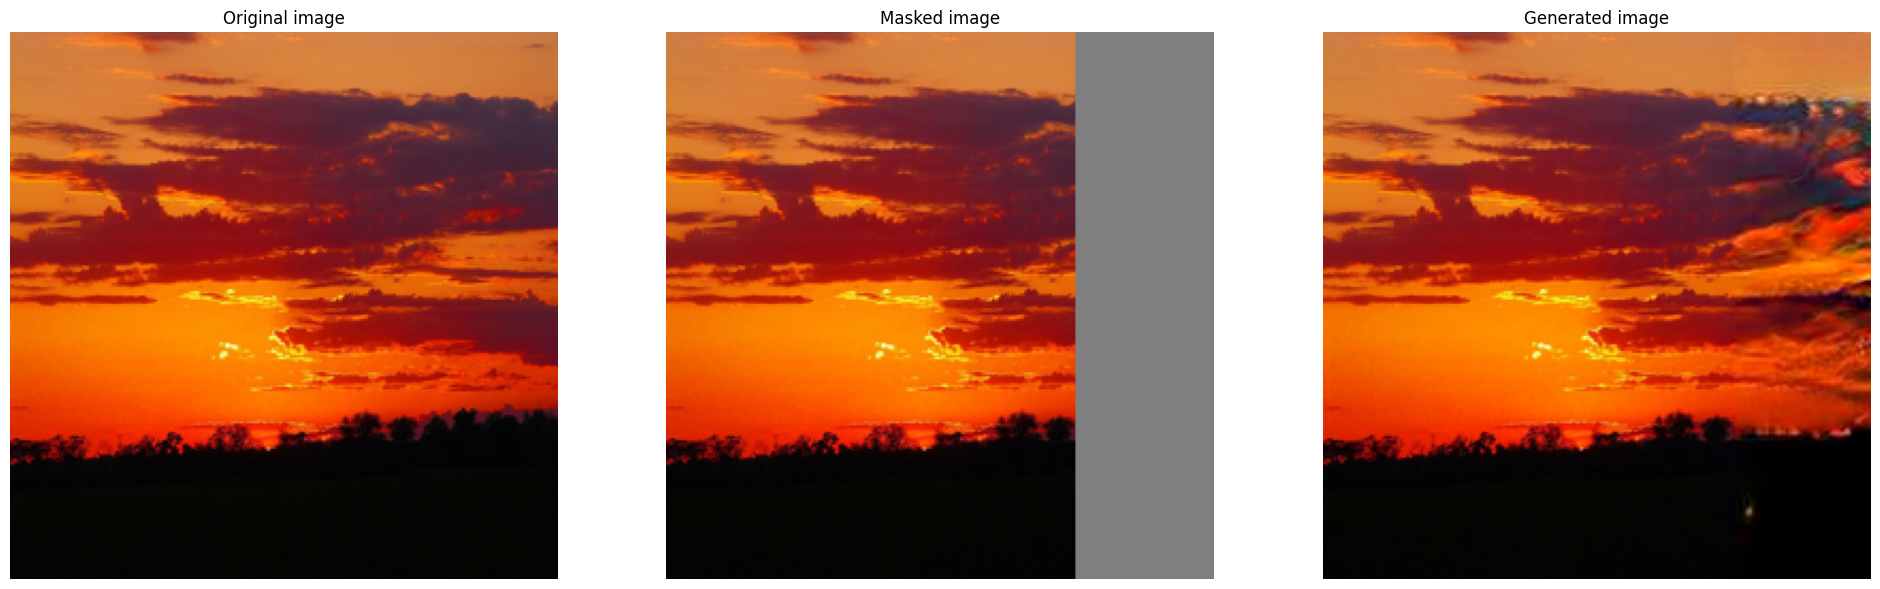

In [28]:
visualize_results(image, masked_image, generated_image)